## Imports

In [3]:
# imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    accuracy_score, f1_score, precision_score, recall_score,
    confusion_matrix, ConfusionMatrixDisplay, classification_report
)
from sklearn.neural_network import MLPClassifier
from sklearn.feature_extraction.text import TfidfVectorizer

## Define Functions

In [4]:
# define evaluation function
def evaluate(y_pred):
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)

    conf_mat = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=conf_mat)
    
    print("Accuracy:    ", accuracy)
    print("F1-Score:    ", f1)
    print("Precision:   ", precision)
    print("Recall:      ", recall)
    print()
    print(classification_report(y_test, y_pred))
    print()

    disp.plot()

## Load .csv into DF

In [5]:
# load data into dataframe
df = pd.read_csv("phishing_email_projectthesis.csv") 

## Prepare Data

In [6]:
# rename columns
df = df.rename(columns={'text_combined': 'content'}).rename(columns={'label': 'target'}) 

In [7]:
# drop duplicates but keep the first
df = df.drop_duplicates(keep='first') 

In [8]:
# randomized undersampling
df = df.groupby('target').apply(lambda x: x.sample(39233, replace=True)).reset_index(drop=True)

/var/folders/gr/nkq2fp191y1_3wywjp14_sz00000gn/T/ipykernel_50733/196238678.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df = df.groupby('target').apply(lambda x: x.sample(39233, replace=True)).reset_index(drop=True)


## Split Dada into Training and Test 80-20

In [9]:
# define X and Y
X = df['content']
y = df['target']

# split data 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# check the shape
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (62772,)
Shape of X_test: (15694,)
Shape of y_train: (62772,)
Shape of y_test: (15694,)


## Vektorize with TF-IDF

In [10]:
# creating vectorizer object with standart parameters
vectorizer = TfidfVectorizer()

# fit on and tranform training data
X_train_tfidf = vectorizer.fit_transform(X_train)

# transform test data 
X_test_tfidf = vectorizer.transform(X_test)

## Multi Layer Perceptron

/Users/nikobiebl/Desktop/Studium/PA2/Project-Thesis/venv/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (4) reached and the optimization hasn't converged yet.
  warnings.warn(


Accuracy:     0.9963043201223397
F1-Score:     0.9962953500255494
Precision:    0.9962953500255494
Recall:       0.9962953500255494

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      7866
           1       1.00      1.00      1.00      7828

    accuracy                           1.00     15694
   macro avg       1.00      1.00      1.00     15694
weighted avg       1.00      1.00      1.00     15694




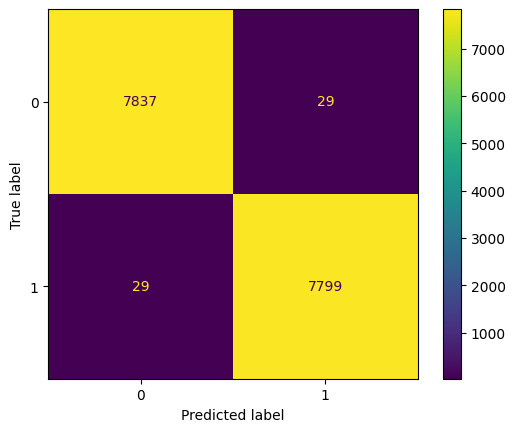

In [41]:
# create classifier object
mlp_tfidf_classifier = MLPClassifier(max_iter=4, random_state=42)

# train classifier
mlp_tfidf_classifier.fit(X_train_tfidf, y_train)

# test classifier
mlp_tfidf_predictions = mlp_tfidf_classifier.predict(X_test_tfidf)

# evaluate
evaluate(mlp_tfidf_predictions)

## Creating Treshold Evaluation

In [42]:
probabilities = mlp_tfidf_classifier.predict_proba(X_test_tfidf)

probabilities_0 = probabilities[:, 0]
probabilities_1 = probabilities[:, 1]

actual_values = y_test

probabilities_and_values_df = pd.DataFrame({
    'probabilities_0': probabilities_0,
    'probabilities_1': probabilities_1,
    'actual_values': actual_values
})

print(probabilities_and_values_df.shape)
print(probabilities_and_values_df.head(20))

(15694, 3)
       probabilities_0  probabilities_1  actual_values
30578         0.998957         0.001043              0
75285         0.000278         0.999722              1
47368         0.000071         0.999929              1
23969         0.999922         0.000078              0
53099         0.000040         0.999960              1
14076         0.999991         0.000009              0
20565         0.999630         0.000370              0
62974         0.000179         0.999821              1
55285         0.000030         0.999970              1
61165         0.000478         0.999522              1
49031         0.001629         0.998371              1
65834         0.000360         0.999640              1
64319         0.002908         0.997092              1
63695         0.000186         0.999814              1
77050         0.000466         0.999534              1
15197         0.999428         0.000572              0
9908          0.981216         0.018784              0

In [45]:
under_60_percent_df = probabilities_and_values_df[(probabilities_and_values_df['probabilities_0'] < 0.6) & (probabilities_and_values_df['probabilities_1'] < 0.60)]

print(under_60_percent_df.shape)
print(under_60_percent_df.head(22))

(22, 3)
       probabilities_0  probabilities_1  actual_values
71855         0.451607         0.548393              1
20776         0.544027         0.455973              0
62399         0.475661         0.524339              1
58881         0.513382         0.486618              1
38003         0.537223         0.462777              0
74776         0.484281         0.515719              1
67052         0.452829         0.547171              1
64740         0.490550         0.509450              1
10942         0.477338         0.522662              0
29411         0.592670         0.407330              0
73937         0.473409         0.526591              1
53976         0.455400         0.544600              1
23626         0.591834         0.408166              0
13645         0.423226         0.576774              0
9986          0.407673         0.592327              0
22269         0.585735         0.414265              0
38028         0.508283         0.491717              0
10

In [46]:
thresholds = np.arange(0.5, 1.0, 0.01)

results = []

for threshold in thresholds:

    classifiable_df = probabilities_and_values_df[(probabilities_and_values_df['probabilities_0'] > threshold) | (probabilities_and_values_df['probabilities_1'] > threshold)]
    
    percentage_classifiable = (len(classifiable_df) / len(probabilities_and_values_df)) * 100
    
    predicted_labels = np.where(classifiable_df['probabilities_1'] > threshold, 1, 0)

    accuracy = accuracy_score(classifiable_df['actual_values'], predicted_labels) * 100
    precision = precision_score(classifiable_df['actual_values'], predicted_labels) * 100
    recall = recall_score(classifiable_df['actual_values'], predicted_labels) * 100
    f1 = f1_score(classifiable_df['actual_values'], predicted_labels) * 100

    results.append({
        'threshold': threshold,
        'classifiable': percentage_classifiable,
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1': f1
    })

results_df = pd.DataFrame(results)

print(results_df.head(50))

    threshold  classifiable   accuracy  precision     recall         f1
0        0.50    100.000000  99.630432  99.629535  99.629535  99.629535
1        0.51     99.987256  99.630385  99.629488  99.629488  99.629488
2        0.52     99.974513  99.636711  99.629440  99.642173  99.635806
3        0.53     99.955397  99.643017  99.642081  99.642081  99.642081
4        0.54     99.936281  99.649324  99.654776  99.642035  99.648405
5        0.55     99.910794  99.649235  99.654643  99.641898  99.648270
6        0.56     99.898050  99.649190  99.654555  99.641806  99.648180
7        0.57     99.898050  99.649190  99.654555  99.641806  99.648180
8        0.58     99.891678  99.655546  99.667306  99.641806  99.654555
9        0.59     99.885306  99.655524  99.667306  99.641806  99.654555
10       0.60     99.859819  99.661817  99.680020  99.641760  99.660887
11       0.61     99.840703  99.661753  99.680020  99.641760  99.660887
12       0.62     99.821588  99.668071  99.679980  99.654466  99